In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 299)
X teste =  (380959, 299)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [5]:
X_train50_train.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
152963,0.000007,104,0,254,0,0,0,5.942857e+07,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
627588,0.013839,2230,13358,31,29,7,11,1.251536e+06,7.507479e+06,34,...,0,0,0,1,0,0,0,0,0,0
37398,8.233840,25576,1094788,31,29,38,390,2.479523e+04,1.062457e+06,456,...,0,0,0,1,0,0,0,0,0,0
486419,0.000004,200,0,254,0,0,0,2.000000e+08,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
1203796,0.016772,2974,33122,31,29,7,18,1.389459e+09,1.548295e+07,48,...,0,0,0,1,0,0,0,0,0,0


In [6]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'Exploits' 'DoS' 'Generic' 'Reconnaissance' 'Fuzzers' 'Analysis'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
import pickle

In [11]:
with open('df_unsw_test50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 299)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [13]:
X_test50.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.022495,2934,3742,31,29,11,15,1.023516e+06,1.306246e+06,52,...,0,0,0,0,0,0,0,0,0,0
1,0.001105,146,178,31,29,0,0,5.285068e+05,6.443439e+05,2,...,0,0,0,0,0,0,0,0,0,0
2,0.573081,824,1298,62,252,2,2,1.035805e+04,1.585814e+04,10,...,0,1,0,0,0,0,0,0,0,0
3,0.001063,146,178,31,29,0,0,5.493886e+05,6.698025e+05,2,...,0,0,0,0,0,0,0,0,0,0
4,0.001016,146,178,31,29,0,0,5.748031e+05,7.007874e+05,2,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'Generic' 'Backdoor' 'Analysis' 'DoS' 'Exploits'
 'Reconnaissance' 'Fuzzers' 'Worms' 'Shellcode']
[0 1]


In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo RandomForest para Train e Validation - Train50

In [18]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [19]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [20]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [21]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [22]:
predict_train50_binary

array([1, 0, 0, ..., 1, 1, 0])

In [23]:
y_train50_binary_test

array([1, 0, 0, ..., 1, 0, 0])

In [24]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.996359188259104

### Visualização da árvore binária

In [25]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

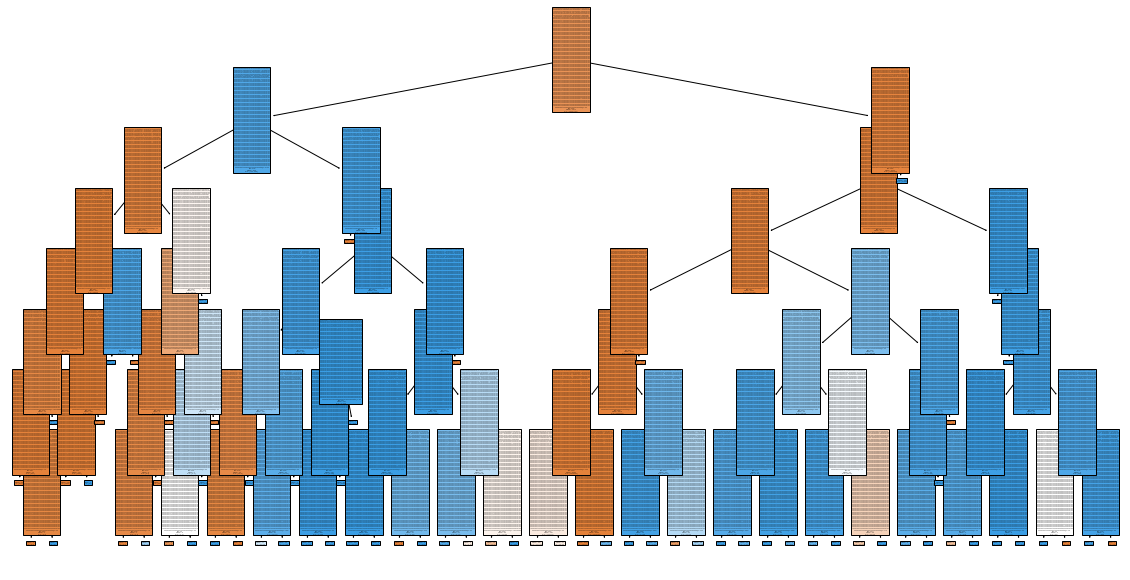

In [27]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [28]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [29]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [30]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [31]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [32]:
predict_train50_multiclass

array(['Exploits', 'Benign', 'Benign', ..., 'Exploits', 'Fuzzers',
       'Benign'], dtype=object)

In [33]:
y_train50_multiclass_test

array(['Exploits', 'Benign', 'Benign', ..., 'Exploits', 'Benign',
       'Benign'], dtype=object)

In [34]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9819193141519166

### Visualização da árvore multiclasse

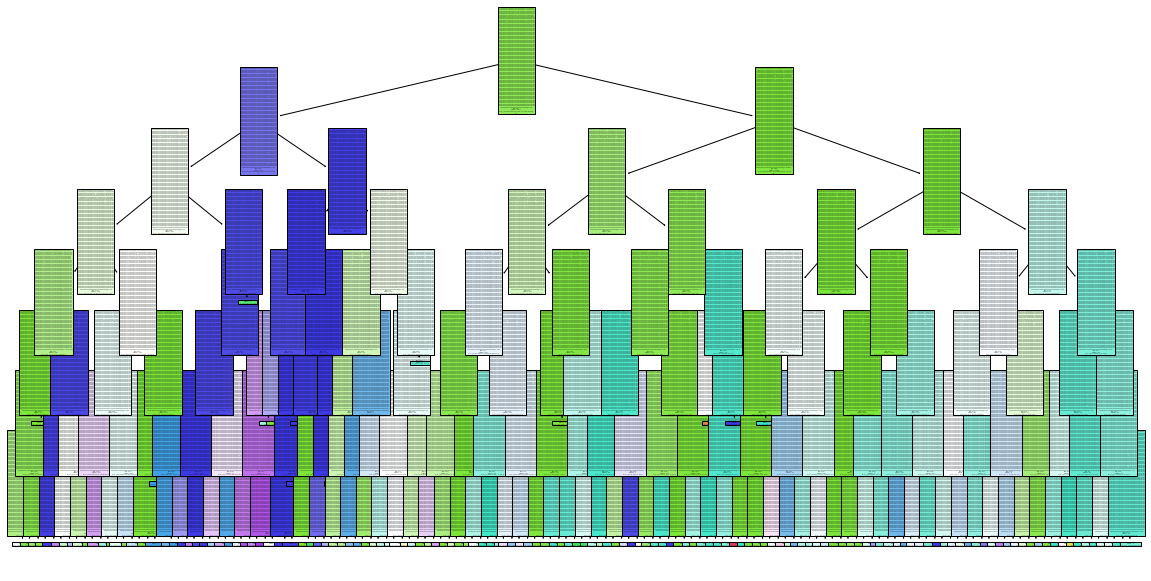

In [36]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [37]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [38]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999952  0.995882  0.997913    332900
           1   0.972255  0.999667  0.985770     48059

    accuracy                       0.996359    380959
   macro avg   0.986103  0.997774  0.991841    380959
weighted avg   0.996458  0.996359  0.996381    380959



In [39]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000       407
      Backdoor   1.000000  0.000000  0.000000       332
        Benign   0.998725  0.997867  0.998296    332900
           DoS   0.952381  0.007933  0.015736      2521
      Exploits   0.553190  0.956541  0.700984      6627
       Fuzzers   0.725013  0.763363  0.743694      3592
       Generic   0.999617  0.970969  0.985085     32276
Reconnaissance   0.831986  0.688157  0.753267      2094
     Shellcode   1.000000  0.000000  0.000000       179
         Worms   1.000000  0.000000  0.000000        31

      accuracy                       0.981919    380959
     macro avg   0.906091  0.438483  0.419706    380959
  weighted avg   0.987250  0.981919  0.979268    380959



### Cross Validation do train50

In [40]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [41]:
score_cv_train50_binary

array([0.99634384, 0.99610759, 0.99663633, 0.99658004, 0.9962088 ,
       0.99671504, 0.99647879, 0.99694004, 0.99652379, 0.99637755])

In [42]:
cv_result_train50_binary

[0.9964911811365067]

In [43]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [44]:
score_cv_train50_multiclass

array([0.98164044, 0.98123545, 0.98204543, 0.98137023, 0.98166273,
       0.98354146, 0.98204522, 0.98225897, 0.98184273, 0.98204522])

In [45]:
cv_result_train50_multiclass

[0.9819687873536864]

### Matriz de Confusão do train50

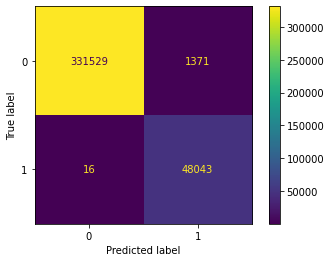

In [46]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

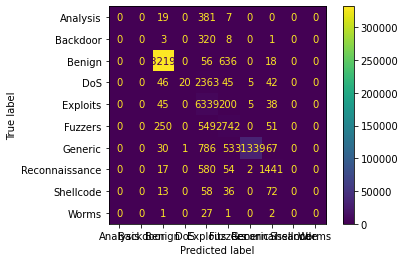

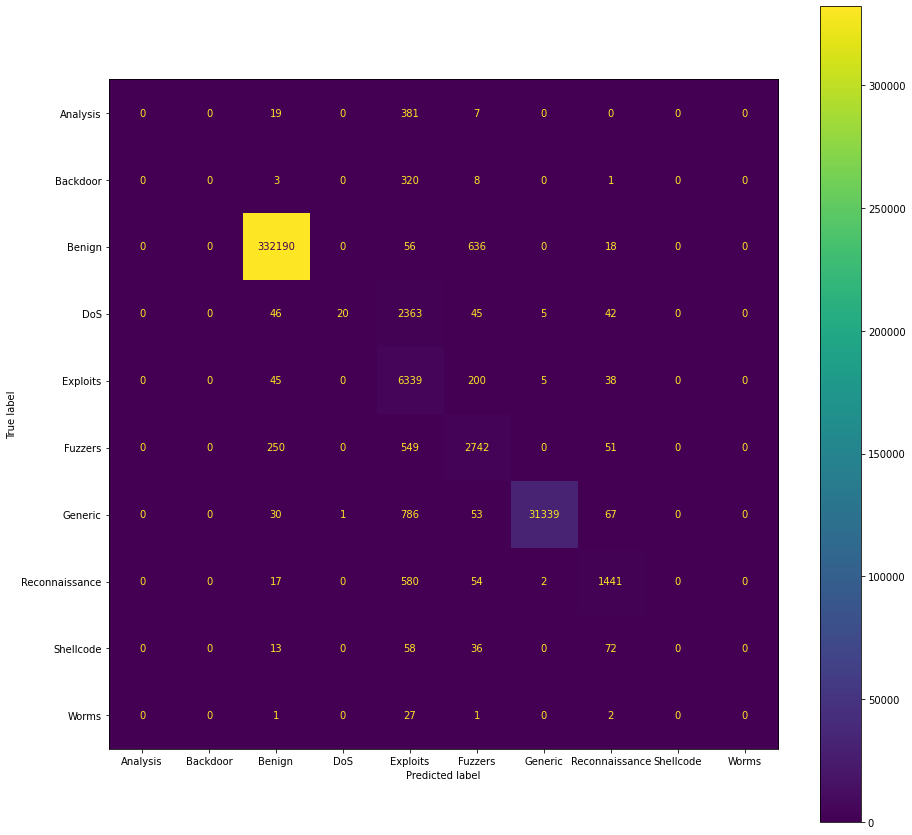

In [47]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [48]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [49]:
predict_test50_binary

array([0, 0, 1, ..., 1, 0, 0])

In [50]:
y_test50_binary

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8086913244252928

### Predição test50 multiclasse

In [52]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [53]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Exploits', ..., 'Exploits', 'Benign',
       'Benign'], dtype=object)

In [54]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Exploits', 'Benign', 'Benign'],
      dtype=object)

In [55]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9596507972507292

### Precision e Recall do test50

In [56]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999998  0.780988  0.877027   1109226
           1   0.398038  0.999988  0.569421    160638

    accuracy                       0.808691   1269864
   macro avg   0.699018  0.890488  0.723224   1269864
weighted avg   0.923850  0.808691  0.838115   1269864



In [57]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000      1338
      Backdoor   1.000000  0.000000  0.000000      1164
        Benign   0.999991  0.971578  0.985580   1109226
           DoS   0.380952  0.002935  0.005826      8176
      Exploits   0.493592  0.958494  0.651622     22262
       Fuzzers   0.269558  0.806071  0.404010     12123
       Generic   0.997611  0.976564  0.986975    107740
Reconnaissance   0.640605  0.653797  0.647134      6993
     Shellcode   1.000000  0.006623  0.013158       755
         Worms   1.000000  0.000000  0.000000        87

      accuracy                       0.959651   1269864
     macro avg   0.778231  0.437606  0.369430   1269864
  weighted avg   0.977973  0.959651  0.963532   1269864



### Matriz de Confusão do test50

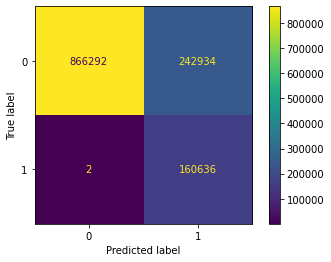

In [58]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

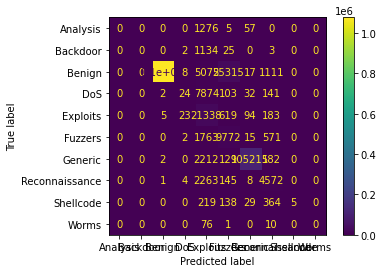

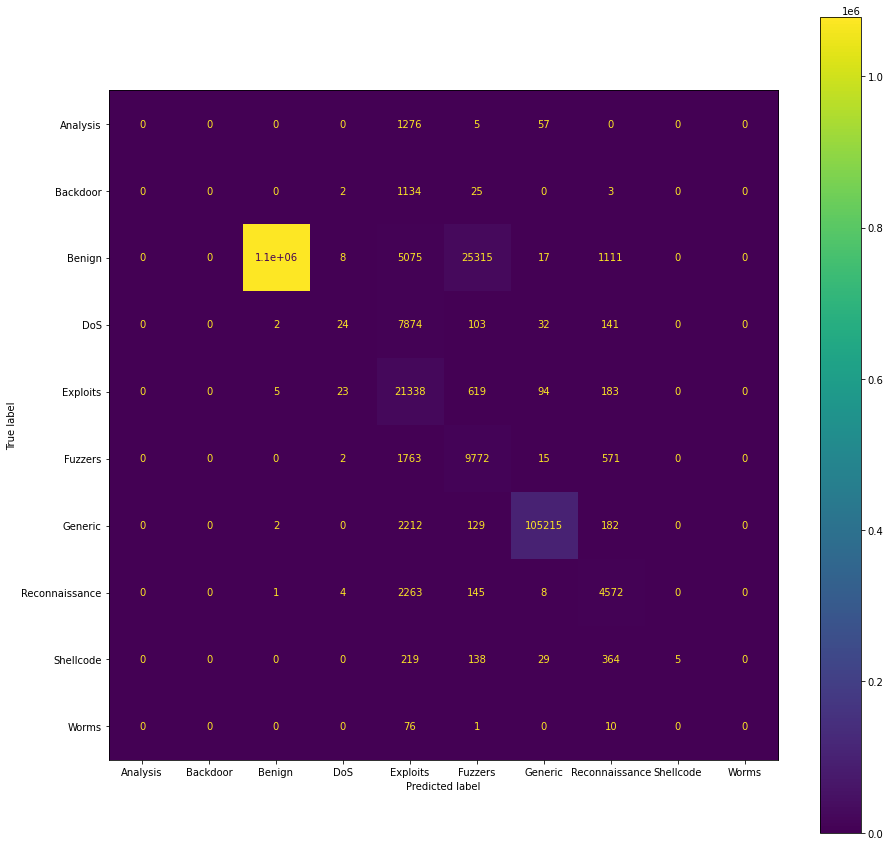

In [59]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)